### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import wordcloud
import nltk

### Loading the Data

In [2]:
tweet = pd.read_csv('Elon_musk.csv',encoding='latin1')

In [3]:
tweet

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df1=tweet.drop(['Unnamed: 0'],axis=1)
df1

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# Data Cleaning

In [5]:
import re #regular expression
import string

def clean_text(Text):
    Text = re.sub('@[A-Za-z0–9_a-zA-Z0-9_a-zA-Z]+',' ', Text)
    Text = Text.lower()
    Text = re.sub('https?:\/\/\S+', ' ', Text)
    Text = re.sub('[^a-zA-z]',' ',Text)
    return Text

df1.Text = df1.Text.apply(clean_text)

In [6]:
df1

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next le...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing exec...
...,...
1994,true it sounds so surreal but the negative...
1995,make sure to read ur terms amp conditions ...
1996,samwise gamgee
1997,altho dumb and dumber is u f u ...


### Sentiment analysis

In [8]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [9]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        sentence = nlp(Text)
        for word in sentence:
            sent_score += affinity_scores.get(word.lemma_, 0)
    return sent_score

In [18]:
df1['sent_value'] = df1['Text'].apply(calculate_sentiment)

In [19]:
# how many words are there in a sentence?
df1['word_count']=df1['Text'].str.split().apply(len)
df1['word_count']

0        4
1       13
2        2
3        3
4       16
        ..
1994    21
1995    11
1996     2
1997     9
1998     3
Name: word_count, Length: 1999, dtype: int64

In [20]:
df1

,Text,sent_value,word_count
0,i m an alien,0,4
1,ray tracing on cyberpunk with hdr is next le...,0,13
2,great interview,3,2
3,doge is underestimated,-1,3
4,congratulations tesla china for amazing exec...,6,16
...,...,...,...
1994,true it sounds so surreal but the negative...,-3,21
1995,make sure to read ur terms amp conditions ...,1,11
1996,samwise gamgee,0,2
1997,altho dumb and dumber is u f u ...,-3,9


### Creating a Word Cloud

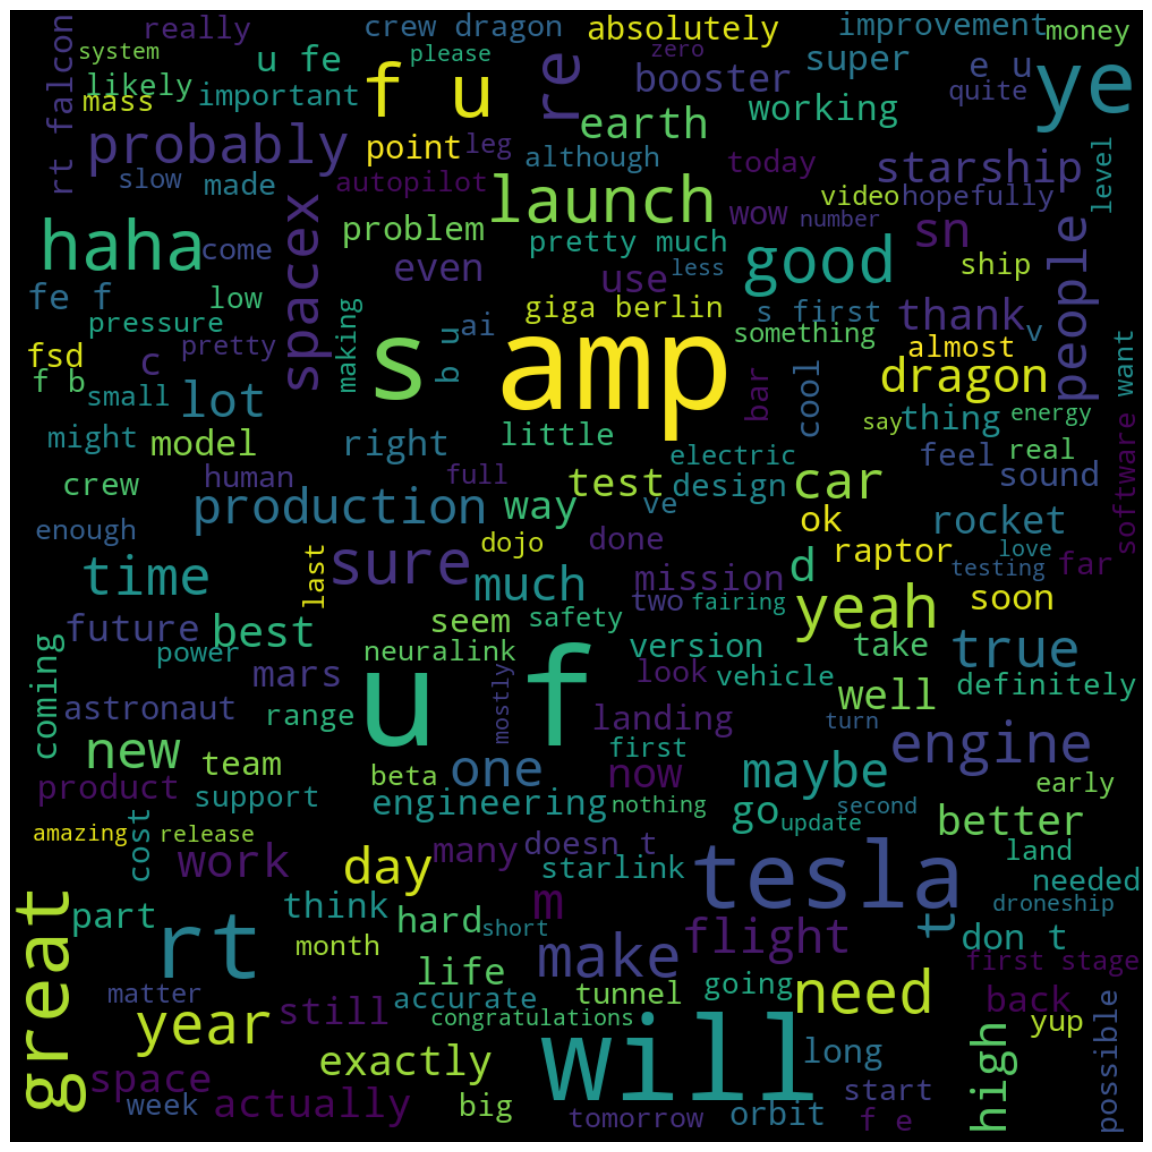

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in df1["Text"]])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(15, 15), dpi=100)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Sentiment score of the whole review

In [21]:
df1['sent_value'].describe()

count    1999.000000
mean        0.728864
std         1.828350
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sent_value, dtype: float64

### Negative sentiment score of the whole review

In [22]:
df1[df1['sent_value']<=0]

,Text,sent_value,word_count
0,i m an alien,0,4
1,ray tracing on cyberpunk with hdr is next le...,0,13
3,doge is underestimated,-1,3
6,frodo was the underdoge all thought he would ...,-2,13
8,indeed tweets definitely do not represent...,0,10
...,...,...,...
1992,ai symbiosis while u wait,0,5
1993,there s some of that too,0,6
1994,true it sounds so surreal but the negative...,-3,21
1996,samwise gamgee,0,2


### Positive sentiment score of the whole review

In [23]:
df1[df1['sent_value']>0]

,Text,sent_value,word_count
2,great interview,3,2
4,congratulations tesla china for amazing exec...,6,16
5,happy new year of the ox,3,6
7,haha thanks,5,2
9,the most entertaining outcome is the most likely,2,8
...,...,...,...
1987,for sure this is both great amp terrify...,3,17
1988,yes,1,1
1989,sorry should hopefully be soon,1,5
1995,make sure to read ur terms amp conditions ...,1,11


In [24]:
def sentiment(sent_value):
    result = ''
    if sent_value < 0:
        result = 'Negative'
    if sent_value == 0:
        result = 'Neutral'
    if sent_value > 0 :
        result = 'Positive'
    return result
df1['sentiment'] = df1.sent_value.apply(sentiment)

In [25]:
df1

,Text,sent_value,word_count,sentiment
0,i m an alien,0,4,Neutral
1,ray tracing on cyberpunk with hdr is next le...,0,13,Neutral
2,great interview,3,2,Positive
3,doge is underestimated,-1,3,Negative
4,congratulations tesla china for amazing exec...,6,16,Positive
...,...,...,...,...
1994,true it sounds so surreal but the negative...,-3,21,Negative
1995,make sure to read ur terms amp conditions ...,1,11,Positive
1996,samwise gamgee,0,2,Neutral
1997,altho dumb and dumber is u f u ...,-3,9,Negative


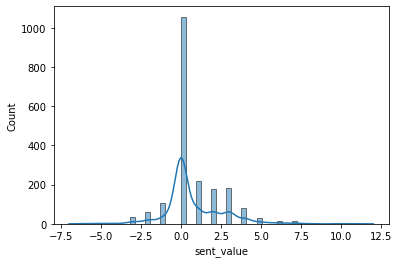

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df1['sent_value'], kde = True)
plt.show()